Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, losses, optimizers, Sequential

In [35]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel('Time'), plt.ylabel('Value')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

def trend(time, slope=0):
    return time * slope

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)
  
  
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

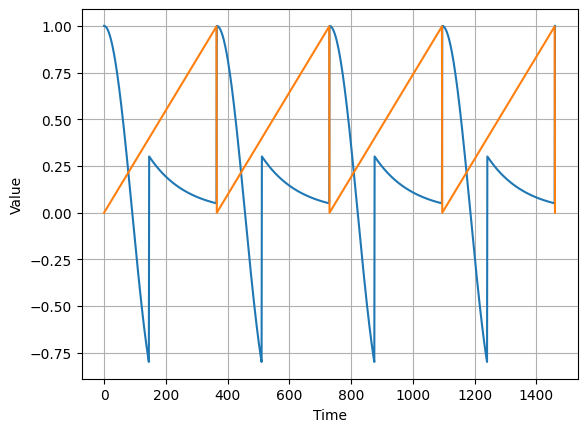

In [37]:
amplitude = 10
time = np.arange(365 * 4 + 1)
series = trend(time, amplitude)
seas = seasonality(time, 365, 1)
arr = ((time + 0) % 365) / 365
# print(arr % 2)
plot_series(time, seas)
plot_series(time, arr)